In [14]:
import pandas as pd
import numpy as np
import os
import collections
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
playerdata = pd.read_sql_query("""SELECT * FROM skpi_football.player_data where tour_id='L41';""", conn)
xgfullvars = pd.read_sql_query("""SELECT * FROM skpi_football.XG_Full_Vars where tour_id='L41';""", conn)

In [16]:
pid=xgfullvars["a_player_id"].str.strip('P')
print(len(xgfullvars["a_player_id"]))
pid=pid.where(pd.notnull(pid)," ")
for i in range(1,len(pid)):
    if pid[i]==' ':
        pid[i]=pid.drop(pid.index[i])
    else:
        pid[i]=float(pid[i])
pid=pid.drop_duplicates()
pid

2286


0                                                     476
1                                                  3424.0
2                                                   157.0
3                                                   427.0
4                                                  3370.0
                              ...                        
2245    0          476
1       3424.0
2        157.0
3...
2257    0          476
1       3424.0
2        157.0
3...
2265    0          476
1       3424.0
2        157.0
3...
2269    0          476
1       3424.0
2        157.0
3...
2277    0          476
1       3424.0
2        157.0
3...
Name: a_player_id, Length: 512, dtype: object

In [17]:
pid=xgfullvars["a_player_id"]
df=xgfullvars[["a_player_id", "a_player_name"]]
df["chances_created"]=0
for i in pid:
    cursor.execute("SELECT * FROM skpi_football.XG_Full_Vars where tour_id='L41' and a_player_id = %s;", (i,))
    a_data = cursor.fetchall()
    a_data = pd.DataFrame(list(a_data), columns=xgfullvars.columns)
    df["chances_created"]=np.where((df["a_player_id"]==i) ,len(a_data),df["chances_created"])

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df=df[df["a_player_id"]!=" "]
df=df.reset_index(drop=True)
df

,a_player_id,a_player_name,chances_created
0,P476,Sahal Abdul Samad,24
1,P3424,Bakary Kone,1
2,P157,Edu Garcia,12
3,P427,Pronay Halder,11
4,P3370,Javier Hernandez,13
...,...,...,...
2004,P340,Manvir Singh,19
2005,P72,Bipin Singh,25
2006,P1648,Bartholomew Ogbeche,11
2007,P341,Marcelo Pereira,9


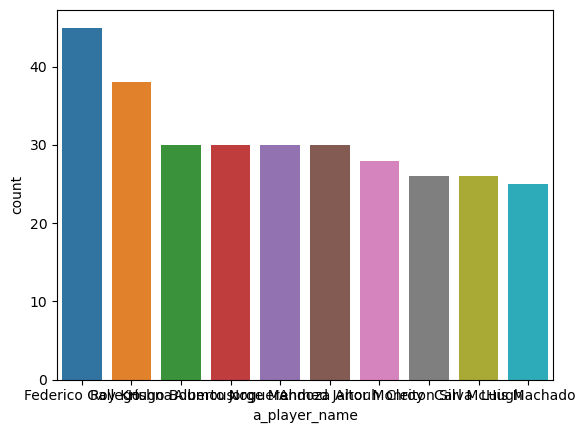

In [19]:
fig,ax = plt.subplots()
sns.countplot(x="a_player_name", data=df, order=df["a_player_name"].value_counts().iloc[:10].index)
fig

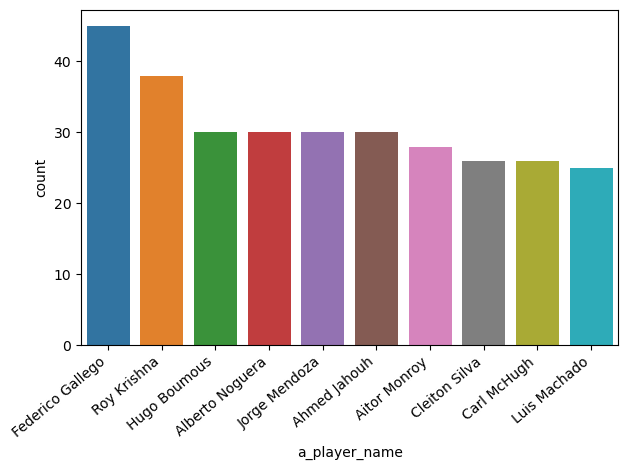

In [20]:
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

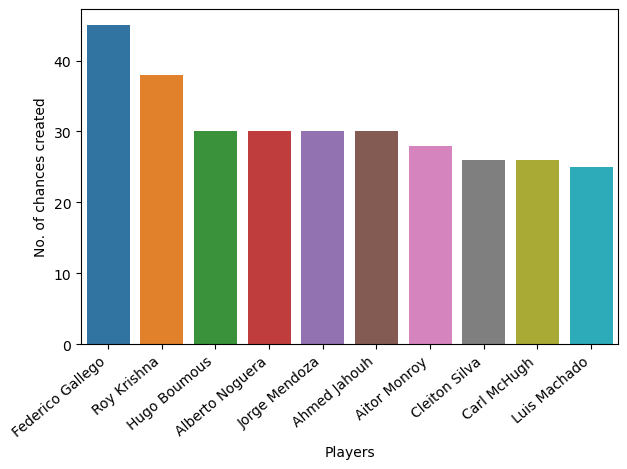

In [21]:
ax.set(xlabel='Players', ylabel='No. of chances created')
fig